**PreProcessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pandas for data analysis 
#numpy for mathematical solving
import pandas as pd
import numpy as np 

In [ ]:
#read the data
data = pd.read_csv("/content/drive/MyDrive/Ridge_Regression/video_games_sales.csv")

In [ ]:
#dimensions of the dataset
data.shape

(16598, 11)

In [ ]:
#splitting the data into train and test(without traget column)
from sklearn.model_selection import train_test_split
#shuffling the dataset, frac = 1 returns all rows
data = data.sample(frac=1)

train_data, test_data = train_test_split(data, test_size=0.2)
#the index labels will be written as the first column
train_data.to_csv("train_dataset.csv")

test_data = test_data.drop(columns=['Global_Sales'])
test_data.to_csv("test_dataset.csv")

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Ridge_Regression/train_dataset.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Ridge_Regression/test_dataset.csv")

In [ ]:
#gives the dimension of the data (rows,columns)
train_data.shape

(13278, 11)

In [ ]:
test_data.shape

(3320, 10)

In [ ]:
#displays the top 5 rows
train_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15806,Kimi ni Todoke: Sodateru Omoi,DS,2009.0,Adventure,Banpresto,0.00,0.00,0.02,0.00,0.02
1,15432,Worldwide Soccer Manager 2007,PC,2006.0,Sports,Sega,0.00,0.02,0.00,0.00,0.02
2,15337,Hakuouki: Yuugi Roku DS,DS,2011.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
3,7732,NHL FaceOff 2001,PS2,2001.0,Sports,Sony Computer Entertainment,0.10,0.07,0.00,0.02,0.20
4,941,inFAMOUS 2,PS3,2011.0,Action,Sony Computer Entertainment,1.05,0.49,0.08,0.23,1.85


In [ ]:
#displays the bottom 5 rows
train_data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13273,3668,SD Gundam G Generation Zero,PS,1999.0,Strategy,Namco Bandai Games,0.00,0.00,0.51,0.04,0.55
13274,11310,101-in-1 Sports Megamix,DS,2010.0,Sports,Nordcurrent,0.08,0.00,0.00,0.01,0.08
13275,10087,Shinseiki Evangelion: Koutetsu no Girlfriend,SAT,1998.0,Adventure,Sega,0.00,0.00,0.11,0.00,0.11
13276,2190,Evolve,PS4,2015.0,Shooter,Take-Two Interactive,0.35,0.41,0.05,0.15,0.95
13277,201,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


In [ ]:
#dispalys the columns names
train_data.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#gives the datatype and nullvalues if present 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13278 entries, 0 to 13277
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          13278 non-null  int64  
 1   Name          13278 non-null  object 
 2   Platform      13278 non-null  object 
 3   Year          13057 non-null  float64
 4   Genre         13278 non-null  object 
 5   Publisher     13226 non-null  object 
 6   NA_Sales      13278 non-null  float64
 7   EU_Sales      13278 non-null  float64
 8   JP_Sales      13278 non-null  float64
 9   Other_Sales   13278 non-null  float64
 10  Global_Sales  13278 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
#gives the descriptive statistics
train_data.describe()
#the mean and 50% has high difference and 75% and max has hing difference

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,13278.000000,13057.000000,13278.000000,13278.000000,13278.000000,13278.000000,13278.000000
mean,8311.163127,2006.413648,0.264001,0.146808,0.077134,0.048276,0.536523
std,4799.631750,5.806355,0.851169,0.520105,0.310705,0.197249,1.605488
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8319.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12466.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#includes only the columns that have object data type
train_data.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,13278,13278,13278,13226
unique,9659,31,12,532
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,9,1735,2620,1073


**Visualization**

In [ ]:
#for visualisation 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#There is a correlation between global_sales and na,eu,jp, and other sales 
train_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.183311,-0.383753,-0.368642,-0.264292,-0.320426,-0.413161
Year,0.183311,1.000000,-0.093340,0.003838,-0.167362,0.036446,-0.076150
NA_Sales,-0.383753,-0.093340,1.000000,0.765262,0.447386,0.624115,0.941241
EU_Sales,-0.368642,0.003838,0.765262,1.000000,0.443383,0.705157,0.902003
JP_Sales,-0.264292,-0.167362,0.447386,0.443383,1.000000,0.293106,0.610297
Other_Sales,-0.320426,0.036446,0.624115,0.705157,0.293106,1.000000,0.738806
Global_Sales,-0.413161,-0.076150,0.941241,0.902003,0.610297,0.738806,1.000000


<AxesSubplot:>

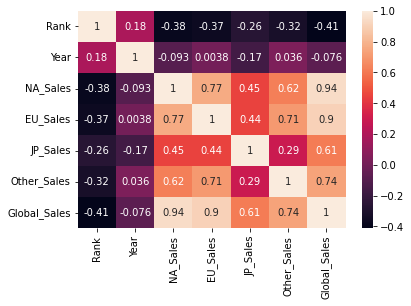

In [ ]:
#to see the correlation 
sns.heatmap(train_data.corr(),annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Platform', ylabel='count'>

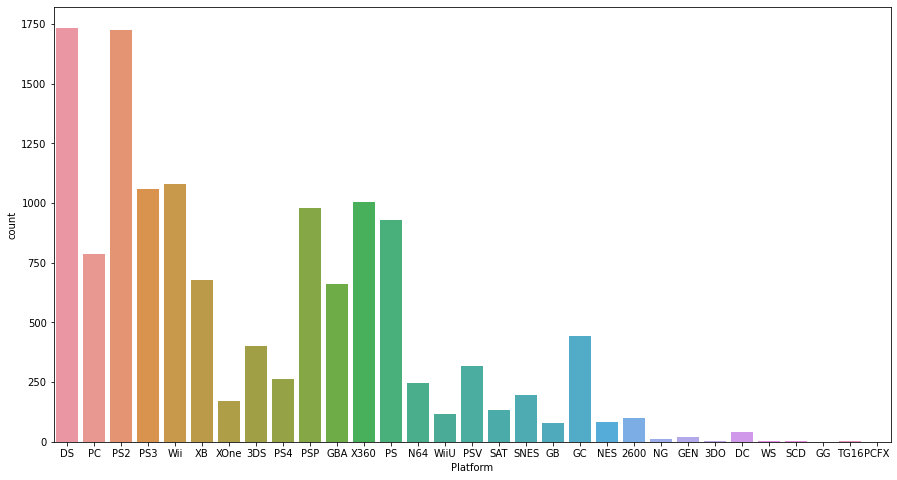

In [ ]:
plt.subplots(figsize = (15,8))
sns.countplot(train_data.Platform)

<AxesSubplot:>

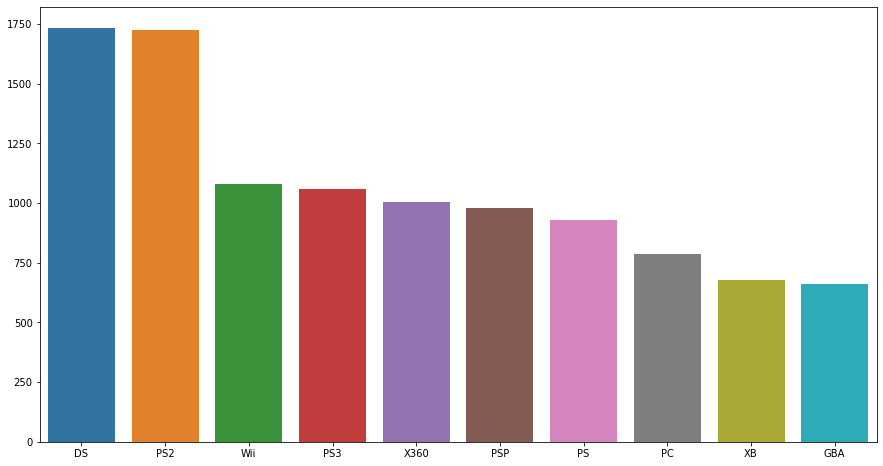

In [ ]:
#select 'Platform' column, drops any rows with missing values and converts the remaining values to a list
#counter--> counts the frequency of each unique platforms
#most common (top 10)
from collections import Counter
platform = Counter(train_data['Platform'].dropna().tolist()).most_common(10)
#name[0] extracts the first element in the list
platform_name = [name[0]for name in platform]
platform_count = [name[1] for name in platform]
plt.subplots (figsize = (15,8))
sns.barplot(x= platform_name, y=platform_count)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Genre', ylabel='count'>

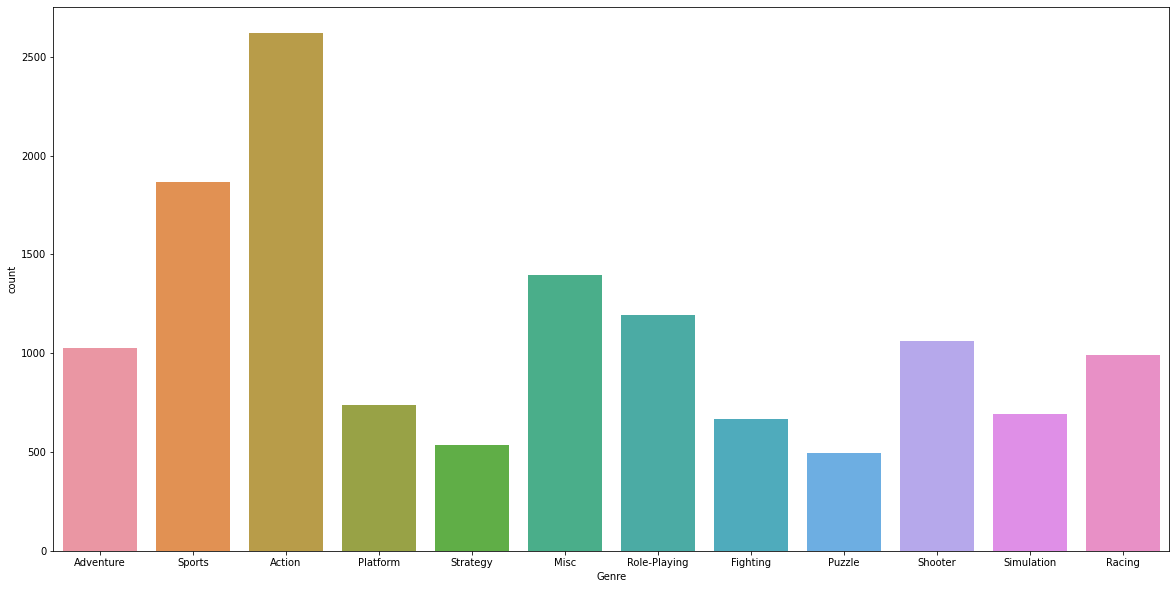

In [ ]:
plt.subplots (figsize = (20,10))
sns.countplot(train_data.Genre)

<AxesSubplot:>

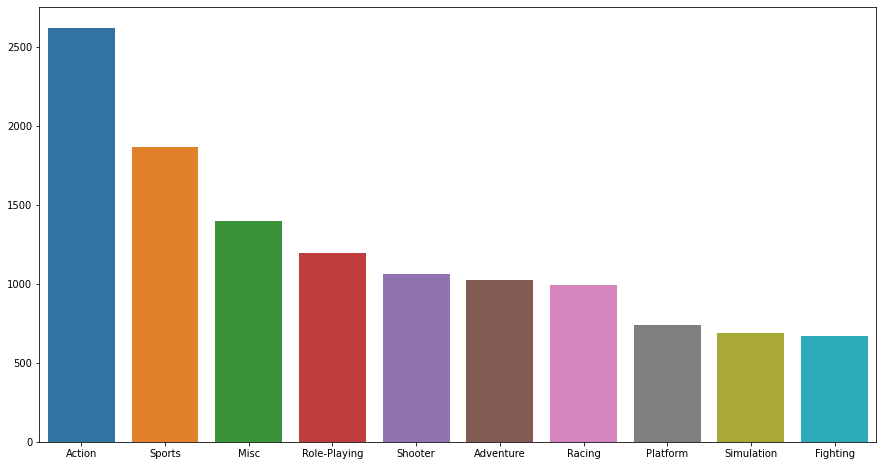

In [ ]:
genre = Counter(train_data['Genre'].dropna().tolist()).most_common(10)
genre_name = [name[0]for name in genre]
genre_count = [name[1] for name in genre]
plt.subplots (figsize = (15,8))
sns.barplot(x= genre_name, y=genre_count)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Publisher', ylabel='count'>

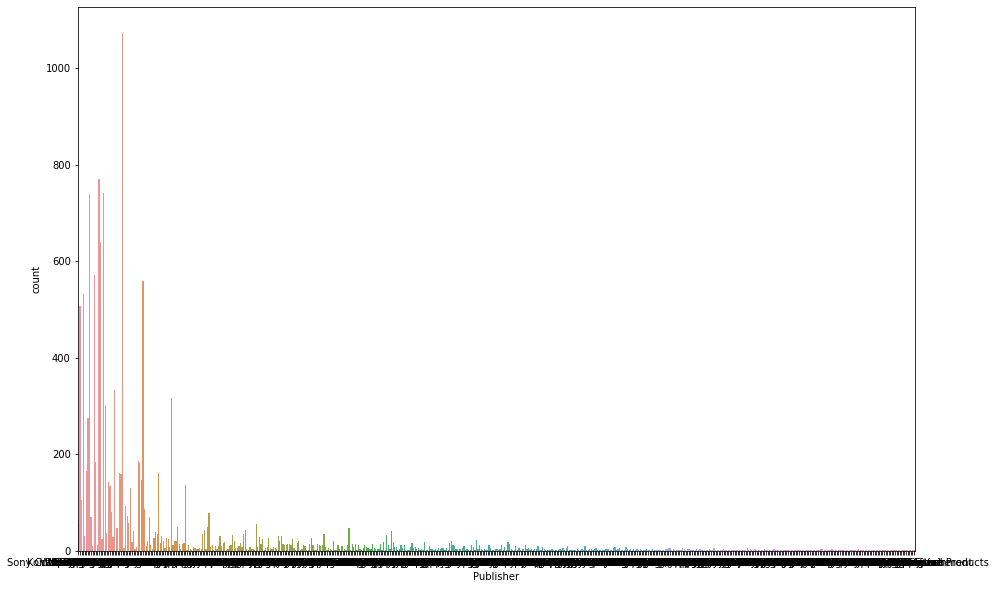

In [ ]:
plt.subplots (figsize = (15,10))
sns.countplot(train_data.Publisher)

<AxesSubplot:>

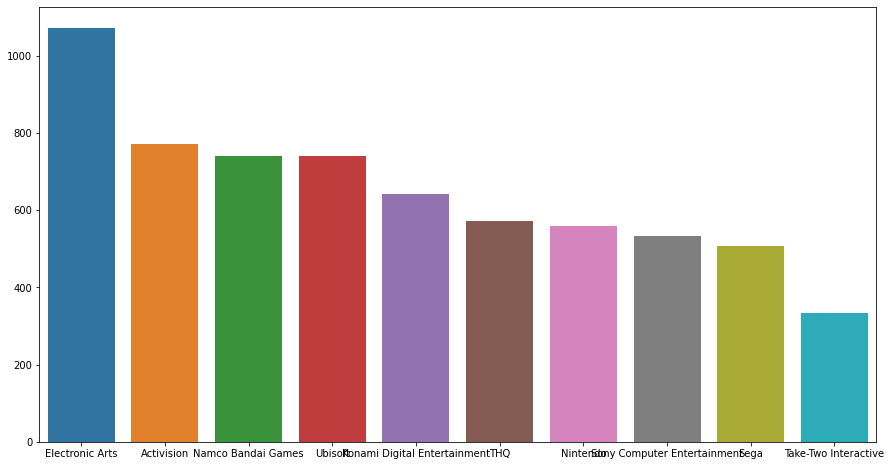

In [ ]:
publisher = Counter(train_data['Publisher'].dropna().tolist()).most_common(10)
publisher_name = [name[0]for name in publisher]
publisher_count = [name[1] for name in publisher]
plt.subplots (figsize = (15,8))
sns.barplot(x= publisher_name, y=publisher_count)

**Outliers**

In [ ]:
#to find any outliers using scatterplot
import plotly.express as px
fig = px.scatter(train_data, x=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'],y='Global_Sales')
fig.show()

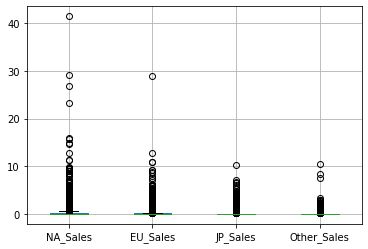

In [ ]:
#to find/see outliers using boxplot
train_data.boxplot(column=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

**Dealing with outliers**

In [ ]:
#capping--> replacing the higher values and lower values
def iqr_capping(train_data,cols,factor):

  for col in cols:

    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)

    iqr = q3-q1

    upper = q3 + (factor*iqr)
    lower = q1 - (factor*iqr)
#if the data point is higher than upper limit then replace it with upper wisker if the point is lower than lower replace it with lower wisker or leave it.
    train_data[col] = np.where(train_data[col]>upper,upper,np.where(train_data[col]<lower,lower,train_data[col]))


In [ ]:
train_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
features = ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']

In [ ]:
iqr_capping(train_data, features , 1.5)

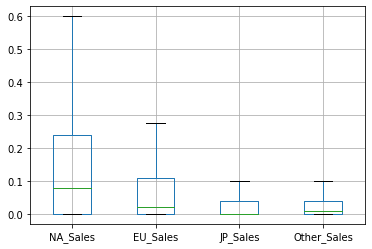

In [ ]:
train_data.boxplot(column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

In [ ]:
train_data = train_data.drop(labels=['Name'],axis=1)
train_data.head()


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15806,DS,2009.0,Adventure,Banpresto,0.0,0.000,0.02,0.00,0.02
1,15432,PC,2006.0,Sports,Sega,0.0,0.020,0.00,0.00,0.02
2,15337,DS,2011.0,Adventure,Idea Factory,0.0,0.000,0.02,0.00,0.02
3,7732,PS2,2001.0,Sports,Sony Computer Entertainment,0.1,0.070,0.00,0.02,0.20
4,941,PS3,2011.0,Action,Sony Computer Entertainment,0.6,0.275,0.08,0.10,1.85


In [ ]:
train_data.dtypes

Rank              int64
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

**Dealing with Null Values**

In [ ]:
#gives us the sum of null values present in the dataset
train_data.isna().sum()

Rank              0
Platform          0
Year            221
Genre             0
Publisher        52
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
#filling the null values with mode
#select first mode incase there are multiple modes
train_data['Year'] = train_data['Year'].fillna(train_data['Year'].mode()[0])

In [ ]:
train_data.isna().sum()

Rank             0
Platform         0
Year             0
Genre            0
Publisher       52
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
#filling nul values with the most frequent 'publisher'
train_data['Publisher'] = train_data['Publisher'].fillna(train_data['Publisher'].mode()[0])

In [ ]:
train_data.isna().sum()

Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#displays whole values or dataset instead of give top few and bottom few
pd.set_option('max_rows',None)

In [ ]:
#each how many are there
train_data['Platform'].value_counts()

DS      1735
PS2     1725
Wii     1082
PS3     1057
X360    1005
PSP      978
PS       930
PC       787
XB       677
GBA      659
GC       444
3DS      403
PSV      319
PS4      263
N64      246
SNES     195
XOne     170
SAT      134
WiiU     115
2600     101
NES       84
GB        79
DC        41
GEN       22
NG        11
WS         5
SCD        4
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
#unique values present the column named 'Platform'
len(train_data['Platform'].unique())

31

In [ ]:
#unique values present the column named 'Genre'
len(train_data['Genre'].unique())

12

In [ ]:
train_data['Genre'].value_counts()

Action          2620
Sports          1864
Misc            1398
Role-Playing    1194
Shooter         1062
Adventure       1025
Racing           991
Platform         737
Simulation       691
Fighting         669
Strategy         534
Puzzle           493
Name: Genre, dtype: int64

In [ ]:
#unique values present the column named 'Publisher'
len(train_data['Publisher'].unique())

532

In [ ]:
train_data['Publisher'].value_counts()

Electronic Arts                           1125
Activision                                 771
Namco Bandai Games                         741
Ubisoft                                    740
Konami Digital Entertainment               641
THQ                                        572
Nintendo                                   560
Sony Computer Entertainment                533
Sega                                       508
Take-Two Interactive                       333
Capcom                                     317
Atari                                      302
Tecmo Koei                                 275
Warner Bros. Interactive Entertainment     187
Square Enix                                184
Disney Interactive Studios                 182
Midway Games                               165
Eidos Interactive                          161
Unknown                                    161
505 Games                                  159
Microsoft Game Studios                     147
Acclaim Enter

**Encoding**

In [ ]:
#categorical variables into numerical labels
from sklearn.preprocessing import LabelEncoder

for i in train_data.columns:
  if train_data[i].dtype == 'object':
    lable_encoder = LabelEncoder()
    train_data[i] = lable_encoder.fit_transform(train_data[i])

In [ ]:
train_data.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15806,4,2009.0,1,57,0.0,0.000,0.02,0.00,0.02
1,15432,13,2006.0,10,414,0.0,0.020,0.00,0.00,0.02
2,15337,4,2011.0,1,210,0.0,0.000,0.02,0.00,0.02
3,7732,16,2001.0,10,423,0.1,0.070,0.00,0.02,0.20
4,941,17,2011.0,0,423,0.6,0.275,0.08,0.10,1.85


**Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['Global_Sales'],axis=1)
y = train_data['Global_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=563)
print(X_train.shape)
print(X_test.shape)

(10622, 9)
(2656, 9)


**Standarizing the dataset**

In [ ]:
#making the std = 1 and mean to 0 for better accuracy and performance
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
train_data = standardizer.fit(train_data).transform(train_data)

In [ ]:
#x_mean = train_data.mean()
#x_std = train_data.std()
#Standardized
#train_data = (train_data - x_mean) / x_std
#train_data.describe()

**Model**

In [ ]:
from sklearn.linear_model import Ridge
r1 = Ridge()
r1.fit(X_train,y_train)
train_prediction = r1.predict(X_train)
test_prediction = r1.predict(X_test)

**Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error
#avg. of the absolute differences between the predicted and actual values
print('train (MAE)error:',mean_absolute_error(y_train,train_prediction))
print('test (MAE)error:',mean_absolute_error(y_test,test_prediction))

train (MAE)error: 0.3953547801329389
test (MAE)error: 0.3846844752747673


In [ ]:
r1.coef_

array([ 7.40428619e-05, -4.07117930e-04, -1.21601768e-02,  8.30412459e-03,
        6.08771892e-05,  3.26514548e+00,  3.11787335e+00,  1.05000484e+01,
        6.97638421e+00])

In [ ]:
y_pred = r1.predict(X_test)
from sklearn.metrics import r2_score
#explains how well the model fits the data
#r2 = 1-(SSE/SST)
#SSE = (predicted values - actual target values)^2
#SST = (actual target values - mean of the target values)^2
r2 = r2_score(y_test,y_pred)
print("R-square:",r2)

R-square: 0.4349548253180706


In [ ]:
from sklearn.metrics import mean_squared_error
#avg. of the squared differences between the predicted and actual values
mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error:",mse)

Mean Square Error: 0.983116864215302


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 0.9915224980883197


**Tuning Hyperparameter**

In [ ]:
#to find the optimal alpha value we use grid search
from sklearn.model_selection import GridSearchCV
#refers to a list of hyperparameters and their corresponding values to be tuned.
param_grid = {'alpha':[0.01,0.1,1,10,100]}
#cv --> the number of cross-validation folds
tuning = GridSearchCV(r1, param_grid,cv=5)
tuning.fit(X_train,y_train)
print("optimal alpha value:",tuning.best_params_)

optimal alpha value: {'alpha': 1}


In [ ]:
r1 = Ridge(alpha=tuning.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
r2 = r2_score(y_test,y_pred)
print("R^2:",r2)
mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error:",mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error:",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Abolute Error:",mae)

R^2: 0.4349548253180706
Mean Square Error: 0.983116864215302
Root Mean Square Error: 0.9915224980883197
Mean Abolute Error: 0.3846844752747673


**Boosting Techniques** 

In [ ]:
#We use XGBoost(Extreme Gradient Boosting) used for preventing overfitting,
#improve generalization, usefl for high-dimensional datasets.
#Its is know for its speed and scalability
from xgboost import XGBRegressor
boosting = XGBRegressor()
boosting.fit(X_train,y_train)
sales_pred_train = boosting.predict(X_train)
sales_pred_test = boosting.predict(X_test)

In [ ]:
r2 = r2_score(y_train,sales_pred_train)
print("R^2:",r2)
mse = mean_squared_error(y_train,sales_pred_train)
print("Mean Square Error:",mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error:",rmse)
mae = mean_absolute_error(y_train,sales_pred_train)
print("Mean Abolute Error:",mae)

R^2: 0.9999972151464319
Mean Square Error: 7.76086823731025e-06
Root Mean Square Error: 0.0027858334905931205
Mean Abolute Error: 0.0012176426495768234


In [ ]:
r2_test = r2_score(y_test,sales_pred_test)
print("R^2 with test:",r2_test)

R^2 with test: 0.997974556995927


**test**

**PreProcessing**

In [ ]:
test_data.shape

(3320, 10)

In [ ]:
test_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,5242,Tomb Raider (2013),PC,NaN,Action,Square Enix,0.06,0.25,0.00,0.05
1,5500,MLB 09: The Show,PS2,2009.0,Sports,Sony Computer Entertainment,0.16,0.13,0.00,0.04
2,10183,Smash Court Tennis 3,X360,2007.0,Sports,Atari,0.08,0.02,0.00,0.01
3,5050,Dai-4-Ji Super Robot Taisen,SNES,1995.0,Strategy,Banpresto,0.00,0.00,0.38,0.00
4,4697,Cool Boarders 2001,PS,2000.0,Sports,Sony Computer Entertainment,0.23,0.16,0.00,0.03


In [ ]:
test_data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3315,5298,One Piece: Gigant Battle 2 Shin Sekai,DS,2011.0,Fighting,Namco Bandai Games,0.00,0.00,0.35,0.00
3316,8193,Fancy Nancy: Tea Party Time!,DS,2010.0,Adventure,THQ,0.17,0.00,0.00,0.01
3317,14514,Hiiro no Kakera: Shin Tamayori Hime Denshou - ...,PSP,2011.0,Adventure,Idea Factory,0.00,0.00,0.03,0.00
3318,5837,Dai-2-Ji Super Robot Taisen OG,PS3,2012.0,Strategy,Namco Bandai Games,0.00,0.00,0.30,0.00
3319,8533,Crash Tag Team Racing,GC,2005.0,Racing,Vivendi Games,0.12,0.03,0.00,0.00


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         3320 non-null   int64  
 1   Name         3320 non-null   object 
 2   Platform     3320 non-null   object 
 3   Year         3270 non-null   float64
 4   Genre        3320 non-null   object 
 5   Publisher    3314 non-null   object 
 6   NA_Sales     3320 non-null   float64
 7   EU_Sales     3320 non-null   float64
 8   JP_Sales     3320 non-null   float64
 9   Other_Sales  3320 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 259.5+ KB


In [ ]:
pd.set_option('max_rows',False)

In [ ]:
test_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [ ]:
test_data = test_data.drop(labels=['Name'],axis=1)
test_data.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,5242,PC,NaN,Action,Square Enix,0.06,0.25,0.00,0.05
1,5500,PS2,2009.0,Sports,Sony Computer Entertainment,0.16,0.13,0.00,0.04
2,10183,X360,2007.0,Sports,Atari,0.08,0.02,0.00,0.01
3,5050,SNES,1995.0,Strategy,Banpresto,0.00,0.00,0.38,0.00
4,4697,PS,2000.0,Sports,Sony Computer Entertainment,0.23,0.16,0.00,0.03


**Dealing with null values**

In [ ]:
test_data.isna().sum()

Rank            0
Platform        0
Year           50
Genre           0
Publisher       6
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
test_data['Year'] = test_data['Year'].fillna(test_data['Year'].mode()[0])

In [ ]:
test_data.isna().sum()

Rank           0
Platform       0
Year           0
Genre          0
Publisher      6
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
test_data['Publisher'] = test_data['Publisher'].fillna(test_data['Publisher'].mode()[0])

In [ ]:
test_data.isna().sum()

Rank           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
test_data.dtypes

Rank             int64
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in test_data.columns:
  if test_data[i].dtype == 'object':
    lable_encoder = LabelEncoder()
    test_data[i] = lable_encoder.fit_transform(test_data[i])

In [ ]:
test_data.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,5242,11,2009.0,0,252,0.06,0.25,0.00,0.05
1,5500,13,2009.0,10,245,0.16,0.13,0.00,0.04
2,10183,24,2007.0,10,30,0.08,0.02,0.00,0.01
3,5050,20,1995.0,11,37,0.00,0.00,0.38,0.00
4,4697,12,2000.0,10,245,0.23,0.16,0.00,0.03


**Standardizing the data**

In [ ]:
#manual Standardizing
x_test_mean = test_data.mean()
print('mean \n',x_test_mean)
x_test_std = test_data.std()
print('std \n',x_test_std)

mean 
 Rank           8258.380120
Platform         13.077711
Year           2006.417169
Genre             4.907831
Publisher       161.459940
NA_Sales          0.267331
EU_Sales          0.146030
JP_Sales          0.080370
Other_Sales       0.047211
dtype: float64
std 
 Rank           4761.105671
Platform          7.266833
Year              5.883196
Genre             3.822508
Publisher        96.001266
NA_Sales          0.661116
EU_Sales          0.441512
JP_Sales          0.303601
Other_Sales       0.149022
dtype: float64


In [ ]:
test_data = (test_data - x_test_mean) / x_test_std
test_data.describe()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03,3.320000e+03
mean,-1.305515e-16,7.062624e-17,-3.261648e-15,5.778510e-17,1.412525e-16,4.066359e-17,3.210283e-17,-7.490661e-17,-2.996265e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732871e+00,-1.799644e+00,-4.490275e+00,-1.283930e+00,-1.681852e+00,-4.043636e-01,-3.307503e-01,-2.647239e-01,-3.168052e-01
25%,-8.383830e-01,-9.739747e-01,-5.808354e-01,-1.022321e+00,-8.485299e-01,-4.043636e-01,-3.307503e-01,-2.647239e-01,-3.168052e-01
50%,-6.800967e-03,-1.069391e-02,9.906712e-02,2.411209e-02,1.722900e-01,-2.833561e-01,-2.854514e-01,-2.647239e-01,-2.497009e-01
75%,8.708313e-01,5.397522e-01,6.089940e-01,8.089371e-01,8.701975e-01,-3.755970e-02,-8.160626e-02,-1.329721e-01,-4.838788e-02
max,1.751824e+00,1.778256e+00,1.628848e+00,1.593762e+00,1.620188e+00,2.081732e+01,2.066530e+01,1.745589e+01,2.746439e+01


In [ ]:
test_data.shape

(3320, 9)

**Prediction**

In [ ]:
#predict() for doing prediction on test data
train_prediction = boosting.predict(test_data)

In [ ]:
prediction_Sales = pd.DataFrame({'Global':train_prediction})
prediction_Sales.to_csv('prediction_Sales.csv',index=False)

In [ ]:
prediction_Sales.shape

(3320, 1)

In [ ]:
prediction_Sales.head()

,Global
0,82.729568
1,82.728508
2,82.728508
3,82.718575
4,82.728508
